# Import necessary Python modules

In [1]:
import torch
import utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from dataloader import MultimodalDataloader, ImageDataloader
from networks import CNNRegression, MultimodalNetwork
from sklearn.metrics import mean_squared_error as mse

# Load all processed data and checkpoints

In [8]:
data_dict = torch.load('data/image_csv_processed.pt')
image_dict = torch.load('data/images_processed.pt')
model_2_losses = torch.load('model_2_losses.pt')
model_3_losses = torch.load('model_3_losses.pt')
model_2_state_dict = torch.load('model_checkpoints/CNN.ckpt')
model_3_state_dict = torch.load('model_checkpoints/MultimodalNN.ckpt')

x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_val = data_dict['x_val']
y_val = data_dict['y_val']
x_test = data_dict['x_test']
y_test = data_dict['y_test']
x_test_image = image_dict['x_test_image']

# Classical model for predicting ages

## Load necessary data to both retrain and analyze the model

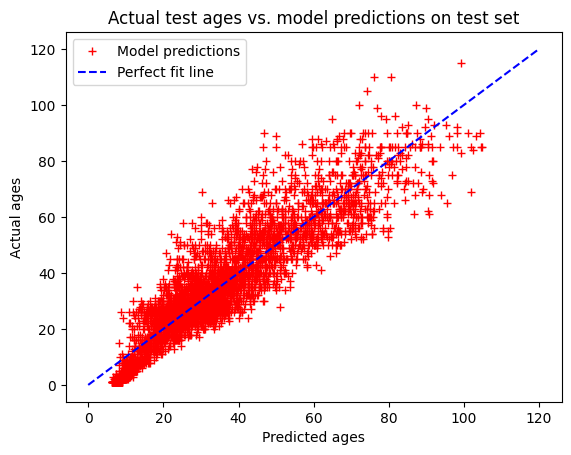

In [3]:
# Linear regression is used as the target feature is age
model = LinearRegression()

model = model.fit(x_train, y_train)

# it has been recommended online to test on the test dataset
pred = model.predict(x_test)

plt.plot(pred, y_test, 'r+', label='Model predictions')
plt.plot([0, 120], [0, 120], 'b--', label='Perfect fit line')
plt.xlabel('Predicted ages')
plt.ylabel('Actual ages')
plt.title('Actual test ages vs. model predictions on test set')
plt.legend()

## Analyze the results using appropriate metrics

In [4]:
# I use the Root Mean Squared Error here
# by taking the square root of the MSE score
# the results can be directly interpreted in terms of target feature
# For example: an RMSE of 10 means that on average, the model predicts 10 years from the actual age
rmse_score = np.sqrt(mse(y_test, pred))

print(f'The RMSE score is {rmse_score}')

The RMSE score is 8.084970474243164


# CNN model for predicting ages

## Setup the model and load the state dictionary

In [5]:
model = CNNRegression()

model.load_state_dict(model_2_state_dict)

<All keys matched successfully>

## Plot out the training and validation loss curves as well as the number of epochs used

Epochs used:  50
Final validation loss: 163.66057 
Note that this is MSE loss.
The RMSE loss is  12.792989


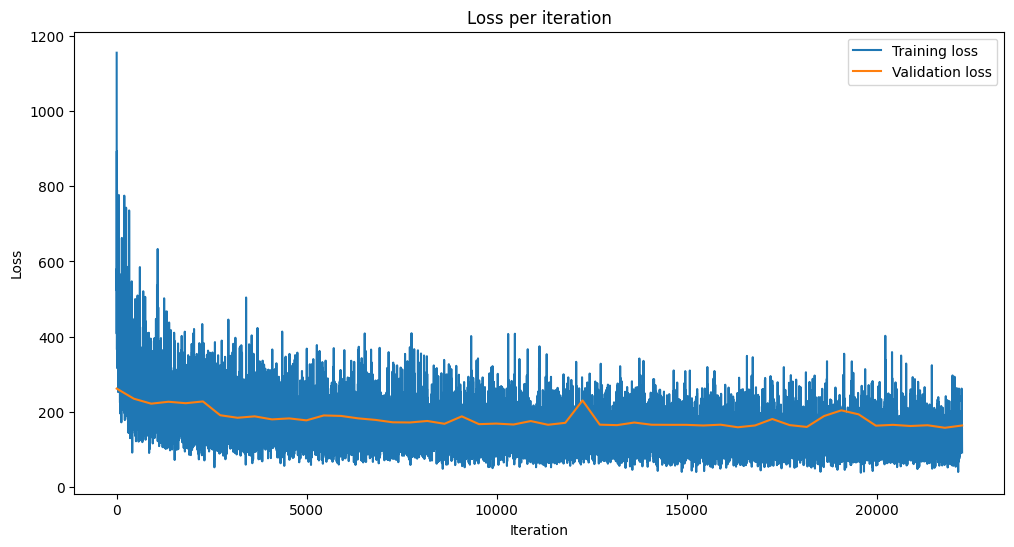

In [6]:
utils.plot_losses(model_2_losses['train_losses'], model_2_losses['val_losses'], model_2_losses['epochs'])

## Predict on the test dataset and show RMSE score

In [9]:
test_dataloader = ImageDataloader(x_test_image, y_test, batch_size=128, randomize=False)

# this ensures model's weights and biases do not change accidentally
model = model.eval()

pred = utils.run_inference(test_dataloader, model)

rmse_score = np.sqrt(mse(y_test, pred))

print(f'The RMSE loss for model 2 is {rmse_score}')

The RMSE loss for model 2 is 12.893837928771973


# Multimodal network for predicting ages

## Setup the model and load the state dictionary

In [10]:
model = MultimodalNetwork()

model.load_state_dict(model_3_state_dict)

<All keys matched successfully>

## Plot out the training and validation loss curves as well as the number of epochs used

Epochs used:  30
Final validation loss: 47.855633 
Note that this is MSE loss.
The RMSE loss is  6.9177766


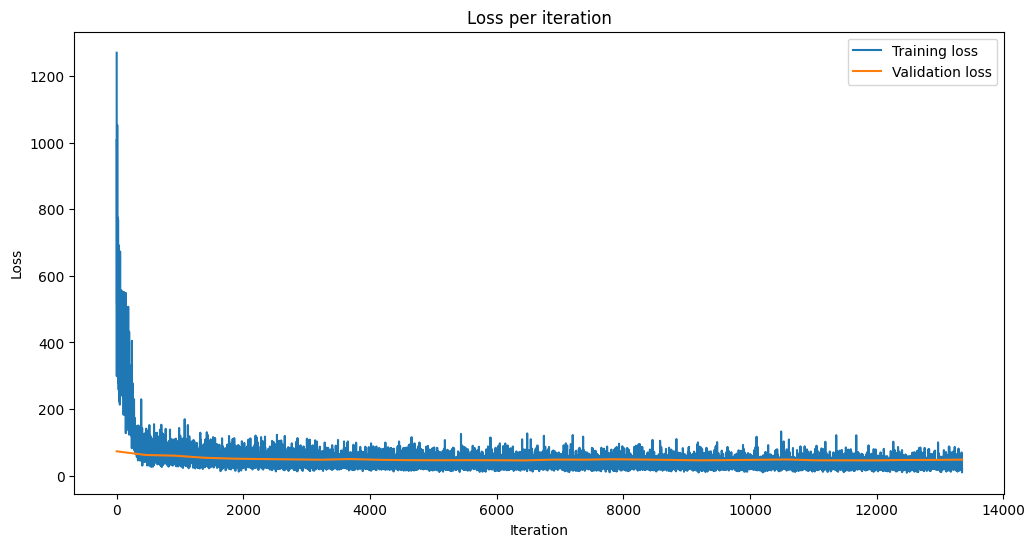

In [11]:
utils.plot_losses(model_3_losses['train_losses'], model_3_losses['val_losses'], model_3_losses['epochs'])

## Predict on the test dataset and show RMSE score

In [13]:
test_dataloader = MultimodalDataloader(x=x_test, images=x_test_image, y=y_test, batch_size=128)

# this ensures model's weights and biases do not change accidentally
model = model.eval()

pred = utils.run_inference(test_dataloader, model, is_model_2=False)

rmse_score = np.sqrt(mse(y_test, pred))

print(f'The RMSE loss for model 3 is {rmse_score}')

The RMSE loss for model 3 is 6.745733261108398
